
# Homework: Logistic Regression

$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\uv}{\mathbf{u}}
 \newcommand{\vv}{\mathbf{v}}
 \newcommand{\tv}{\mathbf{t}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\Im}{\mathbf{I}}
 \newcommand{\Um}{\mathbf{U}}
 \newcommand{\Vm}{\mathbf{V}} 
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
 \newcommand{\Lambdav}{\boldsymbol\Lambda}
$

## Name: <span style="color:blue"> Myles Green </span>

## Utils

In [1]:
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

In [2]:
class TodoCheckFailed(Exception):
    pass

def todo_check(asserts, mute=False, success_msg="", **kwargs):
    locals().update(kwargs)
    failed_err = "You passed {}/{} and FAILED the following code checks:\n{}"
    failed = ""
    n_failed = 0
    for check, (condi, err) in enumerate(asserts):
        exc_failed = False
        if isinstance(condi, str):
            try:
                passed = eval(condi)
            except Exception:
                exc_failed = True
                n_failed += 1
                failed += f"\nCheck [{check+1}]: Failed to execute check [{check+1}] due to the following error...\n{traceback.format_exc()}"
        elif isinstance(condi, bool):
            passed = condi
        else:
            raise ValueError("asserts must be a list of strings or bools")

        if not exc_failed and not passed:
            n_failed += 1
            failed += f"\nCheck [{check+1}]: Failed\n\tTip: {err}\n"

    if len(failed) != 0:
        passed = len(asserts) - n_failed
        err = failed_err.format(passed, len(asserts), failed)
        raise TodoCheckFailed(err.format(failed))
    if not mute: print(f"Your code PASSED all the code checks! {success_msg}")

## Instructions
In this assignment, you will be implementing logistic regression. You will be working with the classical multi-classification MNIST dataset. 

Your job is to read through the assignment and fill in any code segments that are marked by `TODO` headers and comments. Some TODOs will have a `todo_check()` function which will give you a rough estimate of whether your code is functioning as excepted. Other's might not have these checks, like visualization TODOs. Regardless,  all the correct outputs are given below each code cell. It might be useful to copy the contents of certain TODO cells into a new cell so you can try to match the desired output with the output produced by your own code! For visualization TODOs, you simply have to have a plot that looks similar. You can change aspects such as color, titles, or x/y-axis labels if you so wish.

At any point, if you feel lost concerning how to program a specific TODO, take some time and visit the official documentation for each library and read about the methods/functions that you need to use.

## Submission

1. Save the notebook.
2. Enter your name in the appropriate markdown cell provided at the top of the notebook.
3. Select `Kernel` -> `Restart Kernel and Run All Cells`. This will restart the kernel and run all cells. Make sure everything runs without errors and double-check the outputs are as you desire!
4. Submit the `.ipynb` notebook on Canvas.


# Logistic Regression

## Sign Language MNIST dataset 

<center><img src="https://upload.wikimedia.org/wikipedia/commons/f/f7/MnistExamplesModified.png" width=700 height=500></center>

This assignment will have you tackle the famous MNIST classification problem, where the goal is to classify 9 different handwritten digits (0- 9). The MNIST dataset is a frequently used dataset when first being introduced to classification in machine learning. [UCI](https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits) description of the dataset is as follows:

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    
    The data set contains images of hand-written digits: 10 classes where
    each class refers to a digit.
    
    Preprocessing programs made available by NIST were used to extract
    normalized bitmaps of handwritten digits from a preprinted form. From a
    total of 43 people, 30 contributed to the training set and different 13
    to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
    4x4 and the number of on pixels are counted in each block. This generates
    an input matrix of 8x8 where each element is an integer in the range
    0..16. This reduces dimensionality and gives invariance to small
    distortions.

Take note of the following important aspects about the data:

- The data features correspond to 64 pixels which means the images are 8x8. Often, it is best practice to flatten the 2D images into a single 1D array such that the width multiplied by the height determines the number of features (i.e., pixels).
- Pixel values are gray scale and range from 0-255.
- There are 9 classes, one for each digit between 0 and 9.

#### TODO 1 (5 points): Data Loading
Complete the TODO by loading the Iris dataset using Sklearn.

1. Load the MNIST dataset by calling Sklearn's `load_digits()` function and pass the parameter the returns the data as a pandas DataFrame. Store the output into `mnist`.

In [3]:
# TODO 1
from sklearn.datasets import load_digits
mnist = None
mnist = load_digits(as_frame=True)

In [4]:
todo_check([
    ("isinstance(mnist, sklearn.utils.Bunch)", "'mnist' is not of type Bunch"),
    ("isinstance(mnist.data, pd.DataFrame)", "mnist.data is not a Pandas DataFrame. Make sure to pass the correct argument to load_digits()."),
    ("isinstance(mnist.target, pd.Series)", "mnist.target is not a Pandas series. Make sure to pass the correct argument to load_digits()."),
])

Your code PASSED all the code checks! 


In [5]:
mnist.data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [6]:
mnist.target

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int64

## Visualization

#### TODO 2 (10 points): Sample Visualization
Visualize, at least, one sample from each class in the MNIST dataset (total of 9 images should be displayed). To receive full points, the following requirements must be satisfied:

- At least one image is displayed for each class (digits 0-9).
- Each image is clearly labeled with the class label that it corresponds to.

**Hints**
- You will need to reshape the features into a 8x8 image.
- You can use Matplotlib's `imshow()` function to plot images and `plt.cm.gray` as the color map to plot the image in gray-scale.

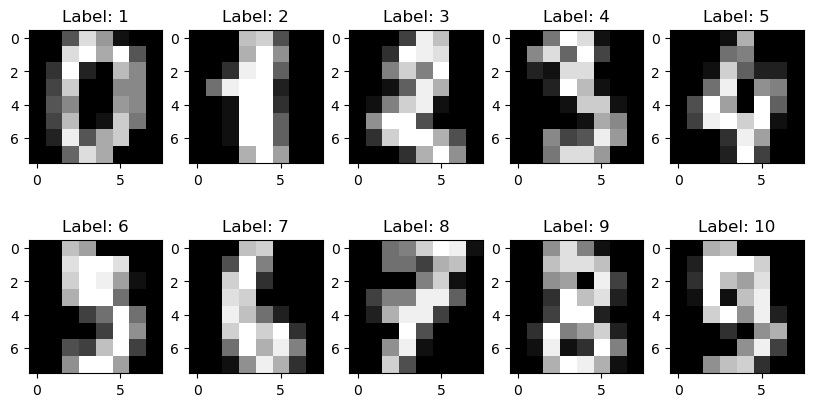

In [7]:
# TODO 2
images = mnist.images  # Shape is (1797, 8, 8)
labels = mnist.target  # Shape is (1797,)

# Find one sample for each class (digits 0-9)
unique_labels = np.unique(labels)
samples = [images[np.where(labels == label)[0][0]] for label in unique_labels]

# Plot the images
plt.figure(figsize=(10, 5))
for i, image in enumerate(samples):
    plt.subplot(2, 5, i + 1)  
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title(f"Label: {i+1}")  

plt.show()

## Data Preprocessing

### Data Splitting

In [8]:
from sklearn.model_selection import train_test_split
def get_train_valid_test_data(
    X: np.ndarray, 
    y: np.ndarray, 
):
    """ Randomizes and then splits the data into train, validation, and test sets.

        Args:
            X: Data given as a 2D matrix

            y: Labels given as a vector 
    """
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=.8, random_state=42)
    X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, train_size=.8, random_state=42)

    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

### Putting it all together

#### TODO 3 (10 points): Preprocess Data

Complete the `get_preprocessed_data()` function for performing data preprocessing by satisfying the below requirements. The function should return a set of NumPy arrays: `X_trn`, `y_trn`, `X_vld`, `y_vld`, `X_tst`, and `y_tst`. 

1. Convert the labels into a one-hot encoding using Sklearn's `OneHotEncoder` class or NumPy.
2. Split the data and labels into train, validation and test sets.
3. Standardize the training, validation, and testing data.
4. Add the bias to the first column of the training, validation, and testing data.

In [9]:
def get_preprocessed_data() -> Tuple[np.ndarray]:
    """ Gets preprocessed data for training, validation, and testing

        Return:
            A tuple of NumPy arrays where indices 0-1 
            contain the training data/targets, indices 2-3
            contain the validation data/targets, and 4-5
            contain the testing data/targets.
    """
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst= None, None, None, None, None, None
    # TODO 3.1 - 3.4from sklearn.preprocessing import OneHotEncoder, StandardScaler
    
    from sklearn.preprocessing import OneHotEncoder, StandardScaler
    
    df = mnist.frame
    X = df.drop(columns=["target"]).to_numpy()
    y = df["target"].to_numpy()
    
    encoder = OneHotEncoder(sparse_output=False)
    encoded_y = encoder.fit_transform(y.reshape(-1, 1))
    
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_train_valid_test_data(X, encoded_y)
    
    scaler = StandardScaler()
    X_trn = scaler.fit_transform(X_trn)
    X_vld = scaler.transform(X_vld)
    X_tst = scaler.transform(X_tst)
    
    X_trn = np.hstack([np.ones((X_trn.shape[0], 1)), X_trn])
    X_vld = np.hstack([np.ones((X_vld.shape[0], 1)), X_vld])
    X_tst = np.hstack([np.ones((X_tst.shape[0], 1)), X_tst])
    
    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

In [10]:
def TEST_get_preprocessed_data():
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data()

    print(f"X_trn shape: {X_trn.shape}")
    print(f"y_trn shape: {y_trn.shape}")

    print(f"X_vld shape: {X_vld.shape}")
    print(f"y_vld shape: {y_vld.shape}")
    
    print(f"X_tst shape: {X_tst.shape}")
    print(f"y_tst shape: {y_tst.shape}")
    
    todo_check([
        # Split and one-hot tests
        ("isinstance(X_trn, np.ndarray)", "X_trn must be a NumPy array."),
        ("isinstance(X_vld, np.ndarray)", "X_vld must be a NumPy array."),
        ("isinstance(X_tst, np.ndarray)", "X_tst must be a NumPy array."),
        ("isinstance(y_trn, np.ndarray)", "y_trn must be a NumPy array."),
        ("isinstance(y_vld, np.ndarray)", "y_vld must be a NumPy array."),
        ("isinstance(y_tst, np.ndarray)", "y_tst must be a NumPy array."),
        ("X_trn.shape == (1149, 65)", "Training data has an incorrect shape, expected (1149, 65)."),
        ("y_trn.shape == (1149, 10)", "Training labels has an incorrect shape, expected (1149, 10)."),
        ("X_vld.shape == (288, 65)", "Validation data has an incorrect shape, expected (288, 65)."),
        ("y_vld.shape == (288, 10)", "Validation labels has an incorrect shape, expected (288, 10)."),
        ("X_tst.shape == (360, 65)", "Testing data has an incorrect shape, expected (360, 65)."),
        ("y_tst.shape == (360, 10)", "Testing labels has an incorrect shape, expected (360, 10)."),
        ("np.argmax(y_trn, axis=1).sum() == 5166", "y_trn had incorrect labels."),
        ("np.argmax(y_vld, axis=1).sum() == 1241", "y_vld had incorrect labels."),
        ("np.argmax(y_tst, axis=1).sum() == 1663", "y_tst had incorrect labelss."),
        # Standardization Tests
        ('np.isclose(X_trn[:, 1:].mean(axis=0).sum(), 0, rtol=0.01)', 'X_trn has potentially incorrect mean values.'),
        ('np.isclose(X_trn[:, 1:].std(axis=0).sum(), 61, rtol=0.01)', 'X_trn has potentially incorrect std values.'),
        ('np.isclose(X_vld[:, 1:].mean(axis=0).sum(), 0.01969, rtol=0.01)', 'X_vld has potentially incorrect mean values.'),
        ('np.isclose(X_vld[:, 1:].std(axis=0).sum(), 56.877, rtol=0.01)', 'X_vld has potentially incorrect std values.'),
        ('np.isclose(X_tst[:, 1:].mean(axis=0).sum(), -0.64754, rtol=0.01)', 'X_tst has potentially incorrect mean values.'),
        ('np.isclose(X_tst[:, 1:].std(axis=0).sum(), 55.0444, rtol=0.01)', 'X_tst has potentially incorrect std values.'),
        # Bias Tests
        ("(X_trn[:, 0] == 1).all()", "The 1st column of `X_trn` does not seem to be the bias term (i.e., full of 1s)."),
        ("(X_vld[:, 0] == 1).all()", "The 1st column of `X_vld` does not seem to be the bias term (i.e., full of 1s)."),
        ("(X_tst[:, 0] == 1).all()", "The 1st column of `X_tst` does not seem to be the bias term (i.e., full of 1s)."),
    ], **locals())
    
TEST_get_preprocessed_data()

X_trn shape: (1149, 65)
y_trn shape: (1149, 10)
X_vld shape: (288, 65)
y_vld shape: (288, 10)
X_tst shape: (360, 65)
y_tst shape: (360, 10)
Your code PASSED all the code checks! 


## Metrics

In [11]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix
)

## Plots

The function `plot_decision_boundary()` aims to draw the decision boundary using a contour plot. This function will only work when your data has 2 features. Remember, having more than 2-3 features (i.e., higher dimensional features) means we have a much harder time visualizing the data. 

In [12]:
def plot_decision_boundary(
    softreg: object, 
    X: np.ndarray, 
    y: np.ndarray,
    xlabel: str = '',
    ylabel: str = '',
    class_names: Dict = None
) -> None:
    """ Plots the decision boundry for data with 2 features. 
    
        Warning: 
            If you have more than 2 features (2D data) the decision boundry
            can not be plotted.
    
        Args:
            softreg: An instance of SoftmaxRegression class
            
            X: Data to be plotted

            y: Labels for corresponding data

            xlabel: X-axis label for plot

            ylabel: Y-axis label for plot
            
            class_names: Dictionary mapping labels to class names.

                Example: {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
    """
    assert X.shape[-1] == 2, f"`X` must have 2 features not {X.shape[-1]}"
        
    if class_names is None:
        class_names = {}

    # Generate fake data to cover entire space of our input features X
    buffer = .5
    x_min, x_max = X[:, 0].min() - buffer, X[:, 0].max() + buffer
    y_min, y_max = X[:, 1].min() - buffer, X[:, 1].max() + buffer
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                         np.arange(y_min, y_max, .02))
    fake_data = np.c_[xx.ravel(), yy.ravel()].reshape(-1,2)
    fake_data =  np.hstack([np.ones((len(fake_data), 1)), fake_data])
    # Make prediction
    y_hat = softreg.predict(fake_data)

    # Plot
    plt.contourf(xx, yy, y_hat.reshape(xx.shape))
    
    labels = np.unique(y)
    for l in labels:
        class_locs = np.where(y == l)[0]
        class_name = class_names.get(l, f'class {l}')
        plt.scatter(X[class_locs, 0], X[class_locs, 1], label=class_name)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

The function `plot_confusion_matrix()`  plots the confusion matrix based on the passed labels and predictions.

In [13]:
def plot_confusion_matrix(
    y: np.ndarray, 
    y_hat: np.ndarray, 
    class_names: Dict[int, str] = None
) -> pd.DataFrame:
    """ Plots a pretty and labeld version of Sklerarn's confusion matrix

        Args:
            y: Ground truth labels given as a 1D vector

            y_hat: Predicted labels given as a 1D vector

            class_names: Dictionary mapping labels to class names.

                Example: {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

        Returns:
            A confusion matrix casted as a DataFrame
    """
    y =  y.flatten() # reshape to make 1D vector for consistency
    y_hat = y_hat.flatten() # reshape to make 1D vector for consistency
    
    cfm = confusion_matrix(y_true=y, y_pred=y_hat)    
    
    labels = np.sort(np.unique(y))
    if class_names is not None:
        classes = []
        for l in labels:
            class_name = class_names.get(l, l)
            classes.append(class_name)
        labels = classes
        
    columns, index = labels, labels
    cfm_df = pd.DataFrame(cfm, index=index, columns=columns)
    sns.heatmap(cfm_df, annot=True, fmt='g')
    plt.show()
    return cfm_df

## Activation Functions

#### TODO 4 (10 points): Sigmoid
Complete the `sigmoid()` function by converting the below logistic sigmoid equation into code. The function should return an array with the same shape as the input `z`.

$$
\large\begin{align}
g(\zv) &= \frac{1}{1 + e^{-\zv}} \\
&= \frac{e^{\zv}}{1 + e^{\zv}} 
\end{align}
$$

**Hint**
- The $\frac{e^{z}}{1 + e^{z}}$ version of the sigmoid function can help to prevent any overflow warnings. However, either version of the equation will pass this TODO.

In [14]:
def sigmoid(z: np.ndarray) -> np.ndarray:
    # TODO 4
    e_z = np.exp(z)  
    return e_z / (1 + e_z)  

x_values shape: (120, 1)
y_values shape: (120, 1)
Your code PASSED all the code checks! 


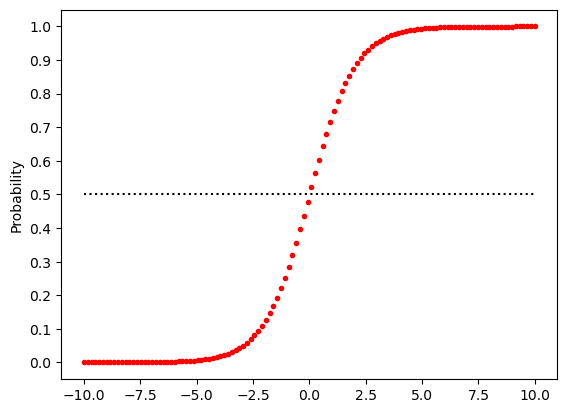

In [15]:
def TEST_sigmoid():
    x_values = np.linspace(-10, 10, 120).reshape(-1, 1)
    y_values = sigmoid(x_values)
    print(f"x_values shape: {x_values.shape}")
    print(f"y_values shape: {y_values.shape}")

    plt.plot(x_values, y_values, '.r')
    plt.hlines(y=.5, xmin=x_values.min(), xmax=x_values.max(), 
               colors='black', linestyles='dotted')
    plt.yticks(np.arange(0, 1+.1, .1))
    plt.ylabel("Probability")

    todo_check([
        ("y_values.shape == (x_values.shape)", "sigmoid() output should be the same shape as the input."),
        ("np.all(np.isclose(y_values[:3].flatten(), np.array([4.53978687e-05, 5.37059651e-05, 6.35343990e-05]),rtol=.01))",
         "The returned sigmoid values were incorrect"),
        ('y_values.min() >= 0', "Minimum value was not 0."),
        ('y_values.max() <= 1', "Maximum value was not 1."),
    ], **locals())
TEST_sigmoid()

#### TODO 5 (10 points): Softmax
Complete the `softmax()` function by converting the below numerically stabilized softmax equation into code. The function should return an array with the same shape as the input `z`.

$$
\large\begin{align}
g(\zv)_i &= \frac{e^{z_i - z_{max}}}{\sum_{k=1}^K e^{z_k - z_{max}}}
\end{align}
$$

**Example**

Assuming the input `z` is a vector with the shape $(1, |K|)$ or a matrix with the shape $(M , |K|)$ where $M$ is the number of samples, $|K|$ is the number of classes, and $k$/$i$ are index locations. This version of the softmax works by subtracting the max for each row $ z_{max}$ to prevent under or overflow errors.  

**Hint**
- To compute $z_{max}$ you will need to take the max over all columns, such that each row has a single value. Think about which axis (0 or 1) corresponds to achieving this when computing the max of `z`.
- You can use `keepdims=True` argument for many NumPy functions to keep the output dimensions the same as the input.


In [16]:
def softmax(z: np.ndarray) -> np.ndarray:
    """ Computes the stablized version of the softmax

        Args:
            z: A vector or matrix of continuous values.

        Return:
            A NumPy array with the same shape as the input.
    """
    # TODO 5
    
    e_z = np.exp(z - np.max(z, axis=-1, keepdims=True)) 
    return e_z / np.sum(e_z, axis=-1, keepdims=True)

In [17]:
def TEST_softmax_vector():
    rng = np.random.RandomState(0)
    z = rng.rand(1, 3)
    print(f"z shape: {z.shape}")
    print(f"z:\n{z}\n")

    probs = softmax(z)
    print(f"probs shape: {probs.shape}")
    print(f"probs:\n{probs}\n")

    todo_check([
        ("probs.shape == z.shape", f"Expected output shape for softmax() to be same as input {z.shape}"),
        ("np.isclose(probs.sum(), np.ones(len(z)))", "The softmax() rows did not sum to 1."),
        ("np.all(np.isclose(probs, np.array([[0.30898065, 0.36491138, 0.32610797]]), rtol=.01))",
         "softmax_probs has incorrect values"),
    ], **locals(), success_msg="+5 points")
    
TEST_softmax_vector()

z shape: (1, 3)
z:
[[0.5488135  0.71518937 0.60276338]]

probs shape: (1, 3)
probs:
[[0.30898065 0.36491138 0.32610797]]

Your code PASSED all the code checks! +5 points


In [18]:
def TEST_softmax_matrix():
    rng = np.random.RandomState(0)
    Z = rng.rand(5, 3)
    print(f"Z shape: {Z.shape}")
    print(f"Z:\n{Z}\n")
    
    probs = softmax(Z)
    print(f"probs shape: {probs.shape}")
    print(f"probs:\n{probs}\n")

    todo_check([
        ("probs.shape == Z.shape", f"Expected output shape for softmax() to be same as input {Z.shape}"),
        ("np.isclose(probs.sum(axis=1), np.ones(len(Z))).all()", "The softmax() rows did not sum to 1."),
        ("np.all(np.isclose(probs[:3, 0], np.array([0.30898065, 0.33421115, 0.23434743]), rtol=.01))",
         "softmax_matrix_probs has incorrecrt values"),
    ], **locals(), success_msg="+5 points")

TEST_softmax_matrix()

Z shape: (5, 3)
Z:
[[0.5488135  0.71518937 0.60276338]
 [0.54488318 0.4236548  0.64589411]
 [0.43758721 0.891773   0.96366276]
 [0.38344152 0.79172504 0.52889492]
 [0.56804456 0.92559664 0.07103606]]

probs shape: (5, 3)
probs:
[[0.30898065 0.36491138 0.32610797]
 [0.33421115 0.29605481 0.36973403]
 [0.23434743 0.36907156 0.396581  ]
 [0.27316453 0.41090326 0.31593222]
 [0.3291452  0.47062004 0.20023476]]

Your code PASSED all the code checks! +5 points


## Negative Log Likelihood (NLL)

#### TODO 6 (10 points): Generalized NLL

Complete the `nll_loss()` function by converting the below average NLL loss equation into code where $f(\xv; \Wm) = P(y \mid \xv; \Wm)$ are the predicted probabilities. This function should return a float.

$$
NLL(\Wm) = - \frac{1}{M}\sum_{m=1}^{M} {\yv_m} * \log[f(\xv_m;\Wm)]
$$



In [19]:
def nll_loss(y: np.ndarray, probs: np.ndarray) -> float:
    """ Computes the average generalized NLL Loss

        Args:
            y: The ground truth one-hot encoded labels
                given as matrix of shape (M, |K|).

            probs: The predicted probabilities for the
                corresponding labels given as a matrix
                of shape (M, |K|)
    """
    # TODO 6
    return (-1/len(y))*np.sum(y*np.log(probs))

In [20]:
def TEST_nll_loss():
    y = np.array([
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.]
    ])
    y_hat_probs = np.array([
        [.1, .5, .4],
        [.1, .2, .7],
        [.3, .45, .25],
    ])
    avg_loss = nll_loss(y=y, probs=y_hat_probs)
    print(f"Averge NLL Loss: {avg_loss}")

    todo_check([
        ("np.isclose(avg_loss, 0.7512649, rtol=.01)", "Incorrect value for `nll_loss()` output")
    ], **locals())

TEST_nll_loss()

Averge NLL Loss: 0.7512649762748712
Your code PASSED all the code checks! 


## Coding Softmax Regression

#### TODO 7 (20 points): Softmax Regression 
Compete the TODO by finishing the `SoftmaxRegression` class implementation.

**`fit()` TODOs**

Follow the below steps to implement the `fit()` method. Feel free to reuse code from prior homework.

1. Implement the `fit()` function according to the pseudocode provided below.
    1. Hint: Subscript $b$ corresponding to index samples at current batch, while $B$ corresponds to the size of the batch (i.e., number of samples in the batch).
    2. Lines 11-15 will be used to measure and store the training/validation NLL loss for the current epoch. Learning curves will not plot without this!
<center><img src="https://live.staticflickr.com/65535/54132218806_ddfa050d7c_c.jpg"/></center>

Follow the below steps to implement the `predict()` method. Feel free to reuse code from prior homework.

2. Compute the predictions by implementing the below equation. Return the predictions as a 2D column vector.
  
$$
 \hat{\yv}  = \arg \max(\Xm \Wm)
$$

**Hint**
- You do not need to reimplement any equations in the code that we have already implemented (e.g., NLL loss). simply reuse those functions.

In [21]:
def get_batches(
    data_len: int, 
    batch_size: int = 32,
) -> List[np.ndarray]:
    """ Generates mini-batches based on the data indexes
        
        Args:
            data_len: Length of the data or number of data samples 
                in the data. This is used to generate the indices of
                the data.
            
            batch_size: Size of each mini-batch where the last mini-batch
                might be smaller than the rest if the batch_size does not 
                evenly divide the data length.

        Returns:
            A list of NumPy array's holding the indices of batches
    """
    indices = np.arange(data_len)
    np.random.shuffle(indices)
    batches = [indices[i:i+batch_size] for i in range(0, data_len, batch_size)]

    return batches

In [22]:
class SoftmaxRegression():
    """ Performs softmax regression using gradient descent
    
        Attributes:

            alpha: learning rate or step size.
                
            batch_size: Size of mini-batches for mini-batch gradient
                descent.
            
            epochs: Number of epochs to run for mini-batch
                gradient descent.
                
            seed: Seed to be used for NumPy's RandomState class
                or universal seed np.random.seed() function.

            W: Matrix of weights with shape (N, |K|) 

            trn_loss: Stores the training loss for each epoch.

            vld_loss: Stores the validation loss for each epoch.
    """
    def __init__(
        self, 
        alpha: float,
        batch_size: int,
        epochs: int = 1,
        seed: int = 0,
    ):

        self.alpha = alpha
        self.batch_size = batch_size
        self.epochs = epochs
        self.seed = seed
        
        self.W = None
        self.trn_loss = None
        self.vld_loss = None

    def fit(self, X: np.ndarray, y: np.ndarray, X_vld: np.ndarray = None, y_vld: np.ndarray = None) -> object:
        """
        Args:
            X: Training features/data
            y: Training labels
            X_vld: Validation features/data
            y_vld: Validation labels
            seed: Seed used for initializing weights
        """
        # Set seed for reproducibility
        np.random.seed(self.seed)
        # Track training/validation loss
        self.trn_loss = []
        self.vld_loss = []
    
        # Number of classes
        n_classes = np.max(y) + 1
    
        # Initialize weights with shape (n_features, n_classes)
        self.W = np.random.randn(X.shape[1], n_classes) * 0.01
    
        for epoch in range(self.epochs):
            batches = get_batches(X.shape[0], self.batch_size)
            for batch in batches:
                X_batch, y_batch = X[batch], y[batch]
                
                # Ensure y_batch is of integer type for indexing
                y_batch = y_batch.astype(int)
    
                logits = X_batch.dot(self.W)  # (batch_size, n_classes)
                probs = softmax(logits)      # (batch_size, n_classes)
    
                # One-hot encode labels
                y_one_hot = np.zeros((len(y_batch), n_classes))  # Shape (batch_size, n_classes)
                for i in range(len(y_batch)):
                    y_one_hot[i, y_batch[i]] = 1
    
                # Compute gradient and update weights
                grad = X_batch.T.dot(probs - y_one_hot) / len(y_batch)
                self.W -= self.alpha * grad
    
            # Track training loss
            logits_trn = X.dot(self.W)      # Full dataset logits
            probs_trn = softmax(logits_trn)  # Full dataset probabilities
            trn_loss = nll_loss(y, probs_trn, n_classes)
            self.trn_loss.append(trn_loss)
    
            # Track validation loss if provided
            if X_vld is not None and y_vld is not None:
                logits_vld = X_vld.dot(self.W)      # Validation logits
                probs_vld = softmax(logits_vld)    # Validation probabilities
                vld_loss = nll_loss(y_vld, probs_vld, n_classes)
                self.vld_loss.append(vld_loss)
    
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        """ Make predictions using learned weights

            Args:
                X: Testing data given as a 2D matrix

            Returns:
                A 2D column vector of predictions for each data sample in X
        """
        # TODO 7.2
        logits = X.dot(self.W)
        probabilities = softmax(logits)
        return np.argmax(probabilities, axis=1)

In [23]:
def TEST_SoftmaxRegression():
    from sklearn.datasets import make_blobs
    X, y = make_blobs(
        n_samples=1000,
          random_state=42,  
          centers=[[2, 1.5], [-1.5, -1], [1, -1]],
          cluster_std=0.6
    )
    n_values = np.max(y) + 1
    y = np.eye(n_values)[y.flatten()]
    X = np.hstack([np.ones([len(X), 1]), X])
    X_trn, X_vld, y_trn, y_vld = train_test_split(X, y, random_state=42)

    softreg = SoftmaxRegression(epochs=100, batch_size=64, alpha=.1, seed=42)
    softreg.fit(X_trn, y_trn, X_vld=X_vld, y_vld=y_vld)
    y_hat = softreg.predict(X_vld)
    
    plt.plot(softreg.trn_loss, label='Train loss')
    plt.plot(softreg.vld_loss, label='Validation loss')
    plt.title("Learning Curve")
    plt.ylabel("Average NLL Loss")
    plt.xlabel("Epoch")
    plt.legend()
    plt.show()
    
    plot_decision_boundary(softreg, X[:, 1:], np.argmax(y, axis=1))

    acc = accuracy_score(np.argmax(y_vld, axis=1), y_hat)
    print(f"Validation Accuracy: {acc}")
    print(f"Weights: {softreg.W.flatten()}")

    todo_check([
        ("len(softreg.trn_loss) == 100", "Expected 100 training evaluations for `self.trn_loss`. Make sure you added code for tracking the training accuracy and added the convergence check."),
        ("len(softreg.vld_loss) == 100", "Expected 100 validation evaluations for `self.vld_loss`. Make sure you added code for tracking the validation accuracy and added the convergence check."),
        ("acc == .98", "Incorrect accuracy value"),
        ("np.all(np.isclose(softreg.W.flatten()[:3], np.array([ -0.29371,  0.95801,  1.39295]), rtol=.01))", "Incorrect weight values.")
    ], **locals())
       
TEST_SoftmaxRegression()

TypeError: 'numpy.float64' object cannot be interpreted as an integer

## MNIST Data With Softmax Regression

#### TODO 8 (25 points)
To complete this TODO by performing multi-classification on the MNIST dataset.

- Data Loading
    - Load the training, validation, and test datasets.
- Training
    - Initialize an instance of `SoftmaxRegression()` and fit it on the training data.
    - Compute and display the training accuracy.
    - Plot the learning curve, which should include the training and validation losses for each epoch.
    - Plot the confusion matrix for the training data.
- Validation
    - Compute and display the validation accuracy.
    - Plot the confusion matrix for the validation data.
- Testing
    - Compute and display the testing accuracy.
    - Plot the confusion matrix for the testing data.
  
**Hints**

- To compute the accuracy and confusion matrix, you will need to undo the one-hot encodings. You can do so by taking the $\arg \max$ over the columns.

#### Training

In [ ]:
#### TODO 8: Training Code

X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data()

softreg = SoftmaxRegression(alpha=0.1, batch_size=64, epochs=100, seed=42)
softreg.fit(X_trn, y_trn, X_vld=X_vld, y_vld=y_vld)

y_trn_pred = softreg.predict(X_trn)
train_accuracy = accuracy_score(np.argmax(y_trn, axis=1), y_trn_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")




#### Validation

In [ ]:
# TODO 8: Validation Code


#### Testing

In [ ]:
# TODO 8: Testing Code


In [ ]:
I was unable to implement SoftmaxRegression and attempted to utilize chatgbt to aid in the implementation which also did not work
The final implementations were equally unsuccessful. 

Understand that this is a poor performance for me. I am sorry. 
Thank you again for the extension period. 